# Assignment 1
_Social graphs and interactions (02805)_

In [1]:
# Global imports
import numpy as np
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as plt
import networkx as nx

## Part 1: Binning degree distributions

### A. Binning real numbers

1. Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [2]:
random_generator = np.random.default_rng(42)

mean = 2
standard_deviation = 0.125
number_of_data_points = 5000

random_data_points = random_generator.normal(mean, standard_deviation, number_of_data_points)

2. Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

> `numpy.histogram` returns a tuple of arrays. The first one contains the count of values per bin, the second array contains the boundaries of the bins. They do not have the same length as the second array contains one more boundary than there are bins.

In [3]:
number_of_bins = 10
histogram = np.histogram(random_data_points, number_of_bins)

print(f"Length of 1st histogram array: {len(histogram[0])}")
print(f"Length of 2st histogram array: {len(histogram[1])}")

Length of 1st histogram array: 10
Length of 2st histogram array: 11


3. Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

> As the bin-array contains 2 boundaries (left and right) for each bin it has one more boundary than the count-array (the right boundary of the preceding count-value being the left boundary of the next count-value). In order to use the `plot()` method the bin-value on the very right is discarded by using `[:-1]`. However, another solution would be to create a new array with values being the mean of their preceding and succeeding value of the existing boundaries.

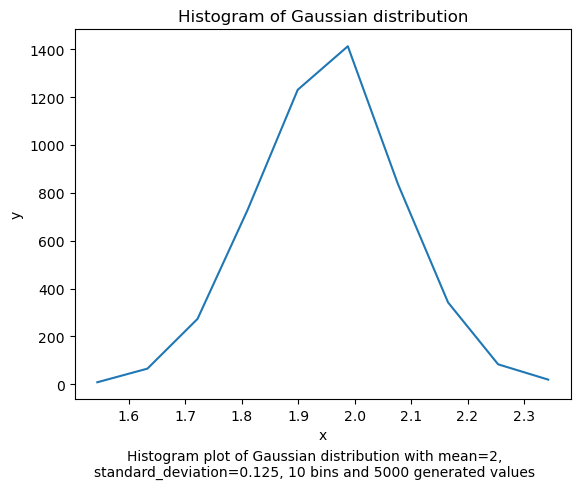

In [4]:
x_values = histogram[1][:-1]
y_values = histogram[0]

plt.plot(x_values, y_values)
plt.title(f'Histogram of Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Gaussian distribution with mean={mean},\nstandard_deviation={standard_deviation}, {number_of_bins} bins and {number_of_data_points} generated values", ha='center')
plt.show()

### B. Binning integers

1. But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [5]:
poisson_lambda = 10
number_of_data_points = 5000

random_poisson_data_points = np.random.poisson(poisson_lambda, number_of_data_points)
random_poisson_max_value = max(random_poisson_data_points)
random_poisson_min_value = min(random_poisson_data_points)

print(f'Maximum value of poisson distributed values: {random_poisson_max_value}')
print(f'Minimum value of poisson distributed values: {random_poisson_min_value}')

Maximum value of poisson distributed values: 23
Minimum value of poisson distributed values: 1


2. Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

> The min-value of the Poisson distribution acts as the left boundary of the first bin (including the `min-value` counts but excluding `min-value` $+ 1$ counts), the `max-value` of the Poisson distribution acts as the righthand-most bin boundary. It includes the `max_value` counts *and* `max_value` $-1$ counts.

In [6]:
# +2 because the value of the stop parameter of range() is exclusive
v = np.array(range(random_poisson_min_value, random_poisson_max_value + 2))

histogram = np.histogram(random_poisson_data_points, bins=v)

sum_over_bin_counts = sum(histogram[0])
print(f'Sum over bin counts: {sum_over_bin_counts}')

Sum over bin counts: 5000


3. Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

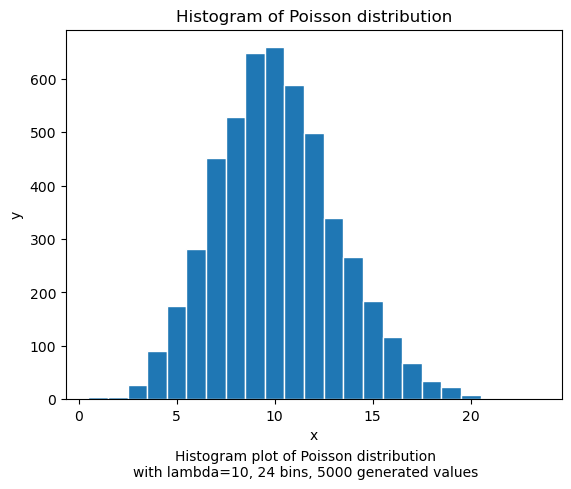

In [7]:
x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of Poisson distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.figtext(.5,-0.05, f"Histogram plot of Poisson distribution\nwith lambda={poisson_lambda}, {len(v)} bins, {number_of_data_points} generated values", ha='center')
plt.show()

### C. Binning and plotting degree distributions

1. Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? **Hint**: The parameter $ \lambda $ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

> The following calculation finds $p$:

$$\lambda = \langle k \rangle = p(N-1)$$
$$\text{ with } \lambda = 10; N = 5000 \Rightarrow 10 = p(5000 - 1)$$
$$p = 10 / 4999 \approx 0.002$$

In [8]:
N = 5000
p = 10 / 4999

2. Now, use `networkx` to create the graph and extract the degree distribution.

In [9]:
import networkx as nx

er_network = nx.erdos_renyi_graph(N, p)

3. Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

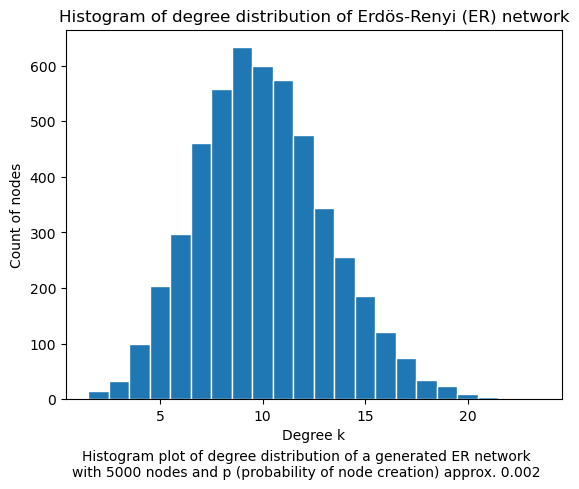

In [10]:
degrees = [degree for (node, degree) in list(er_network.degree())]

er_min_degree = min(degrees)
er_max_degree = max(degrees)

# +2 because the stop parameter of range() is excluded
v = np.array(range(er_min_degree, er_max_degree + 2))

histogram = np.histogram(degrees, bins=v)

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.bar(x=x_values, height=y_values, edgecolor="white", width=(histogram[1][1] - histogram[1][0]))
plt.title(f'Histogram of degree distribution of Erdös-Renyi (ER) network')
plt.xlabel("Degree k")
plt.ylabel("Count of nodes")
plt.figtext(.5,-0.05, f"Histogram plot of degree distribution of a generated ER network\nwith {N} nodes and p (probability of node creation) approx. {p:.3f}", ha='center')
plt.show()

## Part 2: Random networks and plotting in `networkx`

### A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

* Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.

* What is the expected number of links, $〈L〉$?

The maximum number of links $L_{max}$  is computed using the following formula: 

$L_{max} = \frac{N(N-1)}{2}$

Given the probability $p = 10^{–3}$ of nodes connected to each other we can computed the expected number of links:

In [11]:
N = 3000 # number of nodes
p = 1e-3 # probability of nodes being connected
(L) = (p * N * (N - 1)) / 2
print('expected number of links <L>:', (L))

expected number of links <L>: 4498.5


* In which regime is the network?

The regime can easily be tested given *N* and *p* as follows:

In [12]:
print("Subcritical Regime: ", p < 1 / N)
print("Critical Point: ", p == 1 / N)
print("Supercritical Regime: ", p > 1 / N)
print("Connected Regime: ", p > np.log(N) / N)

Subcritical Regime:  False
Critical Point:  False
Supercritical Regime:  True
Connected Regime:  False


Thus, it can be said that the network is in the supercritical regime. Having one gaint component where numerous isolated components coexist with the gaint component - the supercritical regime lasting until all nodes are absorbed by the gaint component.

* Calculate the probability $p_{c}$ so that the network is at the critical point.

The probability $p_{c}$ so that the network is at the critical point is computed using the following formula: $p = \frac{1}{(N-1)}$

In [13]:
p_c = 1 / (N - 1)
print('Critical Point:', p_c)

Critical Point: 0.00033344448149383126


* Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

The number of nodes $N^{cr}$ given the linking probability $p = 10^{–3}$ is computed using scipy.optimize in order to satisfy the equation $p = \frac{ln(N)}{N}$ so that the network is within the connected regime (having only one component):

In [14]:
# first the equation is defined as a funtion of N
def ncr_connected(N):
    p = 1e-3
    y = (np.log(N) / N) - p
    return y

y_guess = 10000 # guess
ncr = fsolve(ncr_connected, y_guess) # 
print("Number of nodes (Ncr): ", ncr)

Number of nodes (Ncr):  [9118.0064704]


Thus, given the linking probability $p = 10^{–3}$ the number of nodes is ~ 9118 so that the network is within the connected regime (having only one component).

* For the network in (d), calculate the average degree  $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$.

The average degree $〈k^{cr}〉$ is computed using the following formula: 

$〈k^{cr}〉 = p_{cr}\cdot(N_{cr}-1)$

and the average distance $〈d〉$ between two randomly chosen nodes is computed using the following formula:

$〈d〉 = \frac{ln(N)}{ln(〈k^{cr}〉)}$

In [15]:
kcr = p*(ncr - 1)
print("<k_cr>:", kcr)

d = np.log(ncr) / np.log(kcr)
print("<d>:", d)

<k_cr>: [9.11700647]
<d>: [4.12553061]


Thus, the average degree $〈k^{cr}〉$ is ~ 9.1170 and the average distance between two randomly chosen nodes $〈d〉$ is ~ 4.1255.

* Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The degree distribution $p_k$ of the network is approximated using the possion form:

$p_k = e^{-〈k〉} \frac{〈d〉^k}{k!}$

Degree distribution: [0.13165633]


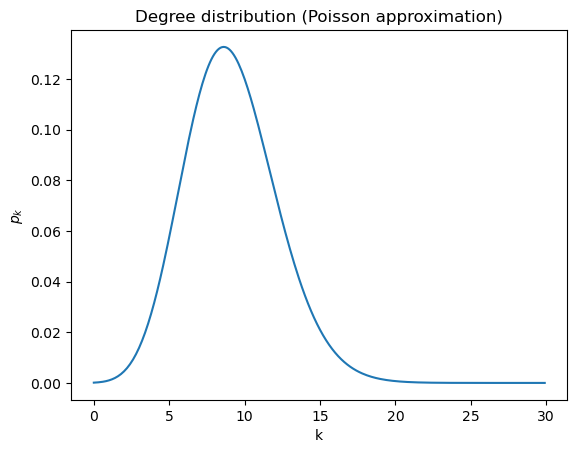

In [16]:
k = p * (ncr - 1)

k = int(k)
pk = np.exp(-kcr) * (kcr**k / np.math.factorial(k))

print("Degree distribution:", pk)

t = np.arange(0, 30, 0.1)
d = np.exp(-kcr)*np.power(kcr, t)/factorial(t)
plt.title("Degree distribution (Poisson approximation)")
plt.ylabel("$p_{k}$")
plt.xlabel("k")
plt.plot(t, d)
plt.show()

The degree distribution is shown in the plot above where the highest probability $p_{k}$ is ~ 0.13 with k around ~ 9 - interestingly the average degree computed early was 9.117.

<!-- TODO -->

## Part 3: Watts-Strogatz Networks

### A.

We generate 3 watts-Strogatz graphs, 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1 in the following code cells:

1. p = 0, 2. p = 0.1 and 3. p = 1

In [ ]:
# Define the 3 graphs
watts_strogatz1 = nx.watts_strogatz_graph(500,4,0)
watts_strogatz2 = nx.watts_strogatz_graph(500,4,0.1)
watts_strogatz3 = nx.watts_strogatz_graph(500,4,1)

Then we calculate the average shortest path length by the built in function average_shortest_path_length of networkx

In [ ]:
# Compute average shortest path length
shortestpath = {'WS_p=0': [nx.average_shortest_path_length(watts_strogatz1)], 
                'WS_p=0.1': [nx.average_shortest_path_length(watts_strogatz2)], 
                'WS_p=1': [nx.average_shortest_path_length(watts_strogatz3)], 

}
print(pd.DataFrame(shortestpath, index=["Average shortest path length"]))

                                 WS_p=0  WS_p=0.1    WS_p=1
Average shortest path length  62.875752  8.169868  4.756321


The average shortest path length for each p is seen in the dataframe printed above.

Q: What happens as p = 1?

A:  P equals the probability of rewiring each edge, i.e. that one link will be rewired. When p is zero it is a regular network with high clustering coefficient and high path length. However as we increase p we add some randomness to the network and decrease both the clustering coefficient and the path length. As p ranges from 0 to 1, when p = 1 we have a fully random network. 

### B.

We want to understand the behavior the WS model a bit better as we increase p. This is achieved by generating 50 different networks with N = 500, k=4 and p={0, 0.01, 0.03, 0.05, 0.1, 0.2} and afterwards plot the average average shortest path length d and the SD to see how fast d decreases.

In [ ]:
# Define networks
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
df = pd.DataFrame(np.zeros((50, len(p))),columns=[str(x) for x in p])

# Compute avarage average shortest path length for all 50x6 graphs
for i in range(len(p)):
    for j in range(0,50):
        df.loc[j,str(p[i])] = nx.average_shortest_path_length(nx.watts_strogatz_graph(500,4,p[i]))


Text(0.5, 1.0, 'Figure 1. Average d and standard deviation for each p')

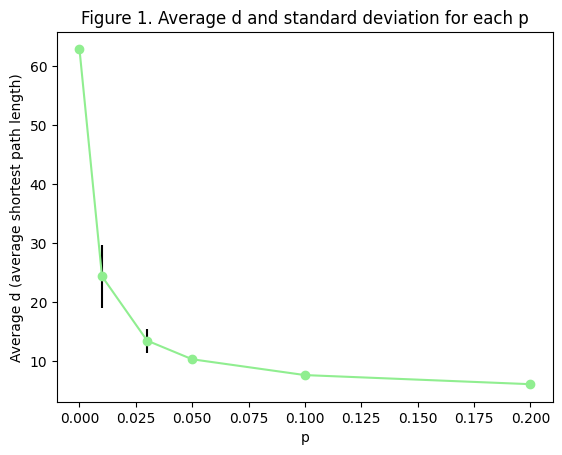

In [ ]:
# Plot d and std for p
plt.errorbar(p, df.mean(axis=0), df.std(),color='lightgreen', ecolor='black',fmt='-o',)
plt.xlabel("p")
plt.ylabel("Average d (average shortest path length)")
plt.title("Figure 1. Average d and standard deviation for each p")

In Figure 1 seen above, we see the average d (taken over 50 networks) and the standard deviation for each value of p. The figure shows, that there is a large decrease in d going from no rewiring(p=0) to a little rewiring(p=0.01). However as we increase p we see a smaller and smaller decrease in d.